## Problem Statement- Predict the total trip duration of taxi trips in New York City

### Hypothesis Generated
 Trip Duration Will Be Affected By 
  1. Pickup datetime of trips
  2. Pickup and Drop Location
  3. No. of Passengers
  4. Traffic Condition
  5. Weather Condition
  6. Mechanical Issue

### Load The Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
import seaborn as sns

In [2]:
df=pd.read_csv("datasets/nyc_taxi_trip_duration.csv")

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


### Check the datatypes of the variables

In [4]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Here, we have to analyse numerical coulmns and convert the pickup_datetime and dropoff_datetime into datetime module.

In [5]:
#coverting the object datatype into datetime feature
df["pickup_datetime"]=pd.to_datetime(df.pickup_datetime)
df["dropoff_datetime"]=pd.to_datetime(df.dropoff_datetime)

In [6]:
#checking the null values
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There are no null values so, we don't need to drop any row.

In [7]:
#Importing the library which let's us calculate the distance from geographical coordinates
from geopy.distance import great_circle

In [8]:
#Defining a function to take cordinates as input and distance as output
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
    start_coordinates=(pickup_lat,pickup_long)
    end_coordinates=(dropoff_lat,dropoff_long)
    return great_circle(start_coordinates,end_coordinates).km

In [9]:
#Applying function to our dataset and creating the feature "distance"
df["distance"]=df.apply(lambda x:cal_distance(x["pickup_latitude"],x["pickup_longitude"],
                                             x["dropoff_latitude"],x["dropoff_longitude"]),axis=1)

In [10]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,4.328540


## Target Variable

 Let us analyse our target variable

In [11]:
#trip duration in minutes
df["trip_duration"].mean()/3600

0.2645080925998545

In [12]:
df["trip_duration"].std()/3600

1.0735072770225331

In [13]:
df["trip_duration"].min()/3600

0.0002777777777777778

In [14]:
df["trip_duration"].max()/3600

538.8155555555555

In [15]:
df["trip_duration"].median()/3600

0.18416666666666667

In [16]:
df["trip_duration"].describe()/3600

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

Let's have a look on graphical visualisation of trip duration

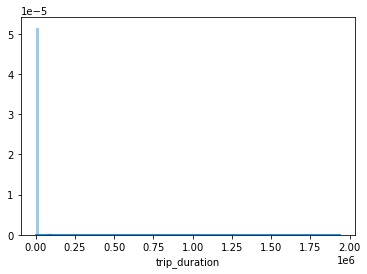

In [17]:
sns.distplot(df["trip_duration"],bins=100)

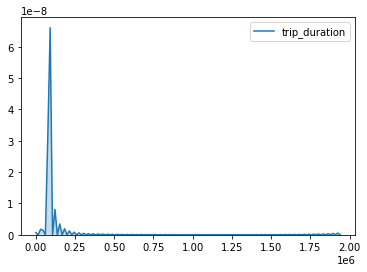

In [18]:
sns.kdeplot(df["trip_duration"],shade=True,legend=True)

Since,there is a huge outlier we will take log of the trip_duration for visualising it better.

In [19]:
df["log_trip_duration"]=np.log(df["trip_duration"].values+1)

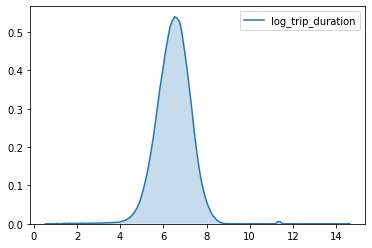

In [20]:
sns.kdeplot(df["log_trip_duration"],shade=True)

1. Now, trip duration of rides are forming normal curve.
2. As noticed there is an outlier near 12.
3. Also there are very short rides present which are of less than 10 seconds, which are suspicious. 

## Univariate Analysis

In [21]:
df["passenger_count"].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
9         1
7         1
Name: passenger_count, dtype: int64

Most rides having only one passenger.

In [22]:
df["distance"].value_counts()

0.000000     2901
0.000424       24
0.000424       20
0.000424       17
0.001273       14
             ... 
21.089769       1
0.999686        1
0.492249        1
1.901582        1
5.258787        1
Name: distance, Length: 726242, dtype: int64

We see there are 2901 rides with 0 km.
 Possible reasons for 0km.
* The dropoff location couldn't be tracked.
* The driver deliberately took this ride to complete a target ride number.
* The Passenger cancelled the trip.

Text(0, 0.5, 'Frequency')

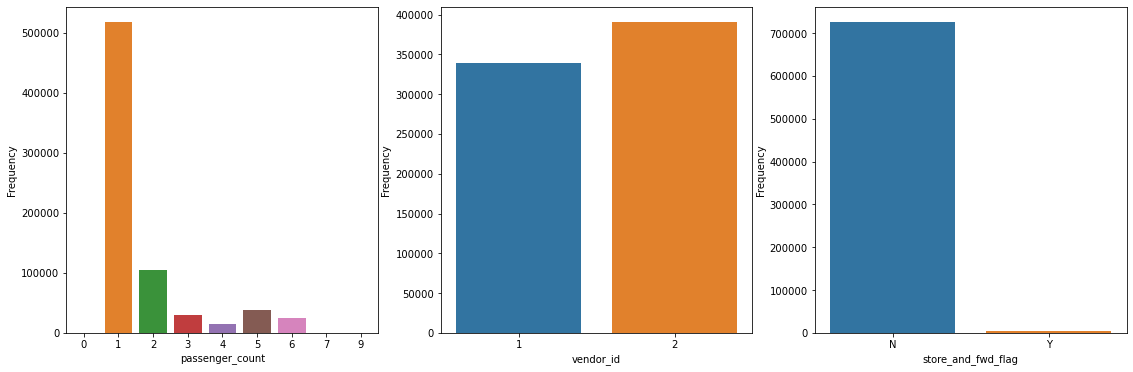

In [23]:
plt.figure(figsize=(19,6))

plt.subplot(1,3,1)
sns.countplot(df["passenger_count"])
plt.ylabel("Frequency")

plt.subplot(1,3,2)
sns.countplot(df["vendor_id"])
plt.ylabel("Frequency")

plt.subplot(1,3,3)
sns.countplot(df["store_and_fwd_flag"])
plt.ylabel("Frequency")

Observation-

1. Most frequent rides include only 1 passenger, while some of the rides include 7 to 9 passengers too and they are very low in number.
2. Most of the rides have been completed by vendor 2 as compared to vendor 1.
3. There is almost no storing of data taking place in the taxi and being updated later. (Y - Yes, N - No)

### Observing trend in pickup datetime of trips

In [24]:
df["day_of_week"]=df["pickup_datetime"].dt.weekday
df["hour_of_day"]=df["pickup_datetime"].dt.hour

Text(0, 0.5, 'Total no of pickups')

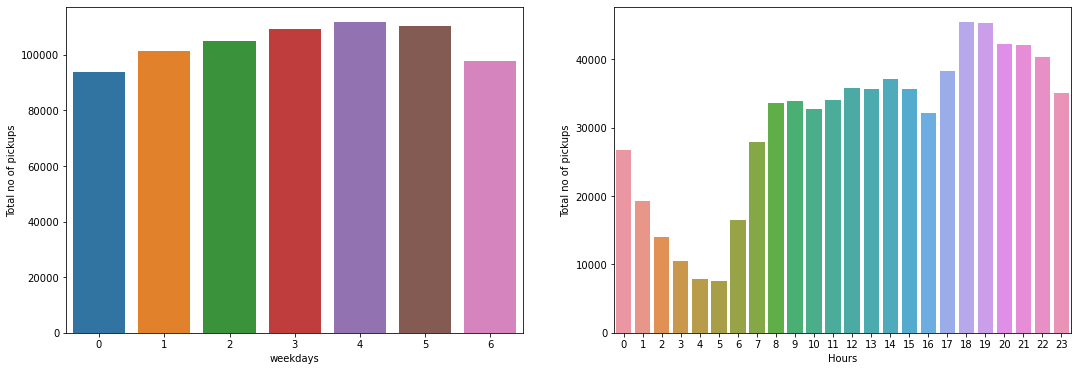

In [25]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.countplot(df["day_of_week"])
plt.xlabel("weekdays")
plt.ylabel("Total no of pickups")

plt.subplot(1,2,2)
sns.countplot(df["hour_of_day"])
plt.xlabel("Hours")
plt.ylabel("Total no of pickups")

Observations-

1. Most of the rides are booked on Thursday.
2. In total 24hrs, most of the rides are booked between 6pm to 7pm.

### Observing location of pickup and dropoff

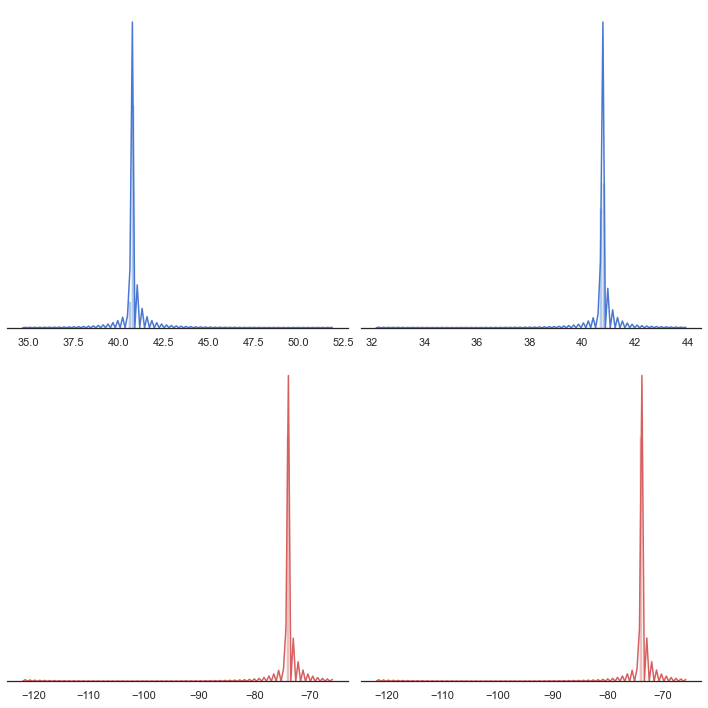

In [26]:
sns.set(style="white",palette="muted",color_codes=True)
f,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,10),sharex=False,sharey=False)
sns.despine(left=True)

sns.distplot(df["pickup_latitude"].values, label="pickup_latitude",color="b",bins=100,ax=axes[0,0])
sns.distplot(df["pickup_longitude"].values, label="pickup_longitude",color="r",bins=100,ax=axes[1,0])
sns.distplot(df["dropoff_latitude"].values, label="dropoff_latitude",color="b",bins=100,ax=axes[0,1])
sns.distplot(df["dropoff_longitude"].values, label="dropoff_longitude",color="r",bins=100,ax=axes[1,1])
plt.setp(axes,yticks=[])
plt.tight_layout()
plt.show()

* Latitude- Blue
* Longitude-Red

Observation-
1. Pickup and dropoff latitudes are dense around 40 to 41 and longitudes are -74 to -73.
2. Extreme values are present in the data which depicts higher value of distance..

Now, remove the outliers and lets looks tha data closely.

In [27]:
#Removal of outliers

df=df.loc[(df.pickup_latitude>40.6)&(df.pickup_latitude<40.9)]
df=df.loc[(df.dropoff_latitude>40.6)&(df.dropoff_latitude<40.9)]
df=df.loc[(df.pickup_longitude>-74.05)&(df.pickup_longitude<-73.7)]
df=df.loc[(df.dropoff_longitude>-74.05)&(df.dropoff_longitude<-73.7)]
df_new=df.copy()

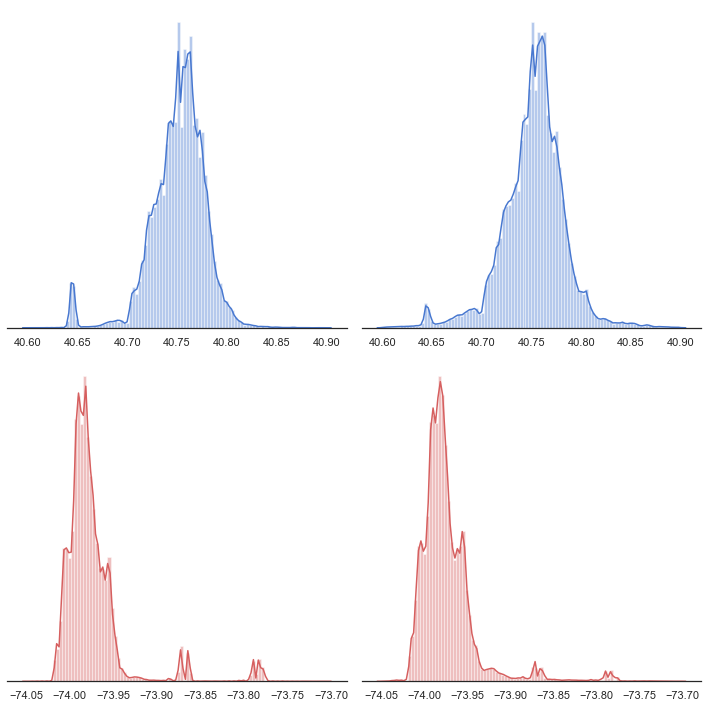

In [28]:
sns.set(style="white",palette="muted",color_codes=True)
f,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,10),sharex=False,sharey=False)
sns.despine(left=True)

sns.distplot(df_new["pickup_latitude"].values, label="pickup_latitude",color="b",bins=100,ax=axes[0,0])
sns.distplot(df_new["pickup_longitude"].values, label="pickup_longitude",color="r",bins=100,ax=axes[1,0])
sns.distplot(df_new["dropoff_latitude"].values, label="dropoff_latitude",color="b",bins=100,ax=axes[0,1])
sns.distplot(df_new["dropoff_longitude"].values, label="dropoff_longitude",color="r",bins=100,ax=axes[1,1])
plt.setp(axes,yticks=[])
plt.tight_layout()
plt.show()

## Bivariate Analysis

We will compare each of the variable with target variable,"trip_duration", in order to derive the relation between them.

In [29]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance', 'log_trip_duration', 'day_of_week',
       'hour_of_day'],
      dtype='object')

### Trip Duration and Weekdays

**Do the trips on weekdays have higher trip duration?**

* We will use Time Series plot 'tsplot', to plot between datetime and a continous variable..
* For plotting each day, we will take central tendency, i.e. median of each day's trip_duration and plot it against the days of week.

In [30]:
average_duration_day=pd.DataFrame(df.groupby(["day_of_week"])["trip_duration"].median())
average_duration_day.reset_index(inplace=True)
average_duration_day["unit"]=1

In [31]:
average_duration_day

,day_of_week,trip_duration,unit
0,0,629,1
1,1,676,1
2,2,695,1
3,3,706,1
4,4,688,1
5,5,634,1
6,6,599,1


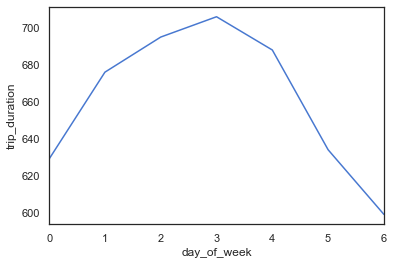

In [32]:
sns.tsplot(data=average_duration_day,time="day_of_week",unit="unit",value="trip_duration");

In [33]:
pip install seaborn==0.9.0

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scipy>=0.14.0 in c:\users\sneha\anaconda3\lib\site-packages (from seaborn==0.9.0) (1.5.0)



Observation-

* Longest trip duration was observed on wednesday.
* Trip duration was lowest on weekends as it's opposite of expectation.

### Trip duration and hour of day

In [34]:
average_hour_duration=pd.DataFrame(df.groupby(["hour_of_day"])["trip_duration"].median())
average_hour_duration.reset_index(inplace=True)
average_hour_duration["unit"]=1

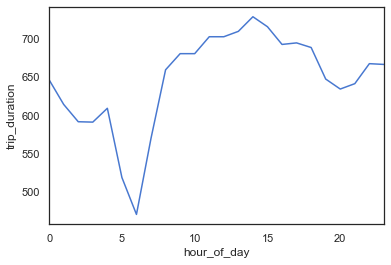

In [35]:
sns.tsplot(data=average_hour_duration,time="hour_of_day",unit="unit",value="trip_duration")
plt.show()

Observation-

* Trip duration during early morning is very low in comparison to evening peak hour because of traffic.
* There is a correlation between pickups and trip duration as it follow the similar trend.

### Trip duration and Vendor Id

**Do the vendors id have any impact on trip duration?**

 We will check the trip duration of each vendor

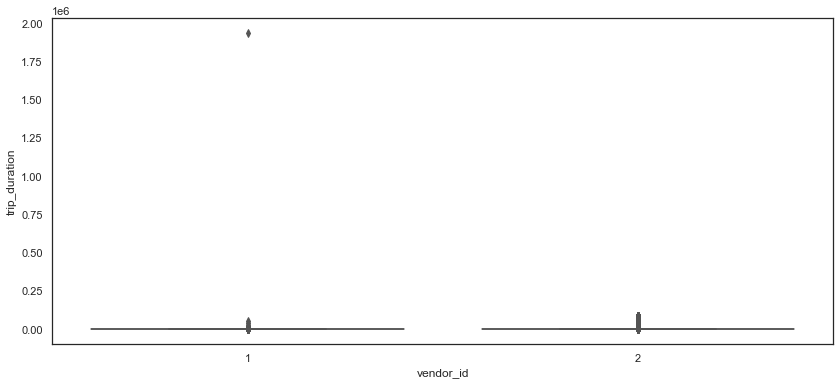

In [36]:
plt.figure(figsize=(14,6))
sns.boxplot(x=df["vendor_id"],y=df["trip_duration"])
plt.show()

Observation-

* As we can see there is a huge outlier present in vendor id 1 as compared to vendor id 2.
* Let's remove the outliers and observe the plot deeply.

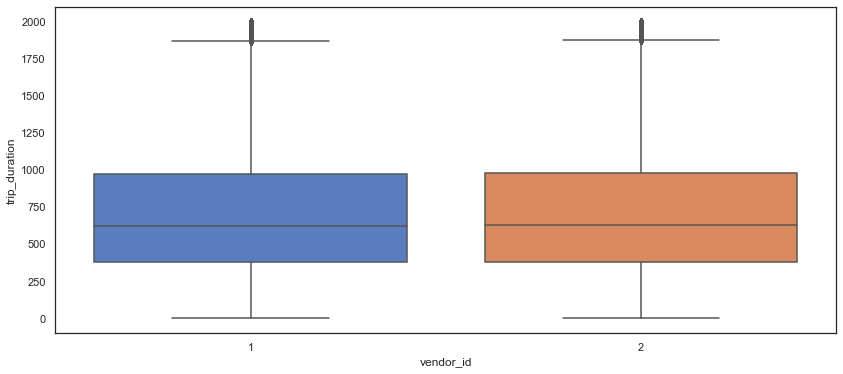

In [37]:
plt.figure(figsize=(14,6))
trip_without_outlier=df[df["trip_duration"]<2000]
sns.boxplot(x="vendor_id",y="trip_duration",data=trip_without_outlier)
plt.show()

Observation-

* Both vendor's trip duration median lies around 600.

## Trip duration and Passenger count

**Are passengers with higher count taking longer trip duration?**

We will check the trend of trip duration with passenger count.

In [38]:
df["passenger_count"].value_counts()

1    515243
2    104576
5     38776
3     29561
6     24035
4     13972
0        31
9         1
Name: passenger_count, dtype: int64

As we know the median of trip duration lies around 600 and here we have huge outliers present so we will consider data with less than 10000 only.

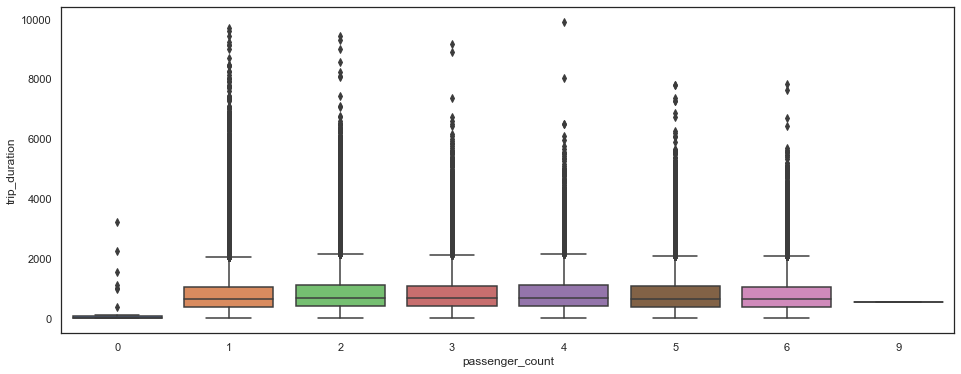

In [39]:
plt.figure(figsize=(16,6))
trip_duration_new=df[df["trip_duration"]<10000]
sns.boxplot(x="passenger_count", y="trip_duration", data=trip_duration_new)
plt.show()

Observation-

* There are few trips recorded without any passenger.
* Trips with 1 and 2 number of passenger haaving high outliers.
* As the no of passengers are are increasing outliers are decreasing.

## Correlation Heatmap

We will check the correlation among all of the variables through heatmap.

In [40]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,log_trip_duration,day_of_week,hour_of_day
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,1.199074,5.993961,0,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4.129117,7.003974,4,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,7.250763,7.400010,6,17
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2.361101,7.040536,1,9
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,4.328540,6.744059,2,6


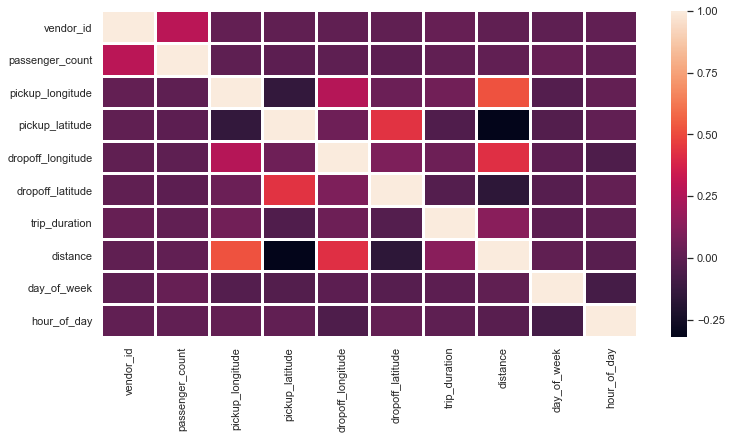

In [41]:
df_drop=df.drop(["id","pickup_datetime","dropoff_datetime","log_trip_duration"],axis=1)
plt.figure(figsize=(12,6))
corr=df_drop.corr("pearson")
sns.heatmap(corr,linewidth=2)
plt.show()

Observation-

## Conclusion-

1. The log trip duration forming normal curve.
2. Maximum rides are including one passenger while 7-8 passengers rides are low in numbers.
3. Most of the rides have been completed by vendor 2 as compared to vendor 1.
4. There is almost no storing of data taking place in the taxi and being updated later.
5. Longest trip has been observed on wednesday.
6. Trips are lowest on weekends.
7. Pickup and drop latitudes are denser around 40 to 41, and longitude are denser around -74 to -73.
8. As the numbers of passengers are increasing outliers are decreasing.
9. Trips with 1 and 2 number of passenger haaving high outliers.
